## Evaluation of Group Recommendation with Aggregation Strategy: "Average" for a Full Social Context Recommender versus both a trust-based social recommender and a baseline Item-Item Collaborative Filtering Recommender



### Loading recommendation output and test data

In [1]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats


# Load results files: n = 100
recs100 = pd.read_csv('output/AVG-100full-soc-trst/recs.csv')
test_data100 = pd.read_csv('output/AVG-100full-soc-trst/testdata.csv')
preds100 = pd.read_csv('output/AVG-100full-soc-trst/preds.csv')

# Load results files: n = 10
recs10 = pd.read_csv('output/AVG-10full-soc-trst/recs.csv')
test_data10 = pd.read_csv('output/AVG-10full-soc-trst/testdata.csv')
preds10 = pd.read_csv('output/AVG-10full-soc-trst/preds.csv')

# Load results files: n = 5
recs5 = pd.read_csv('output/AVG-5full-soc-trst/recs.csv')
test_data5 = pd.read_csv('output/AVG-5full-soc-trst/testdata.csv')
preds5 = pd.read_csv('output/AVG-5full-soc-trst/preds.csv')

# Load results files: n = 3
recs3 = pd.read_csv('output/AVG-3full-soc-trst/recs.csv')
test_data3 = pd.read_csv('output/AVG-3full-soc-trst/testdata.csv')
preds3 = pd.read_csv('output/AVG-3full-soc-trst/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [2]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results100 = rla.compute(recs100, test_data100)
ndcg100 = results100.groupby('Algorithm').ndcg.mean()
precision100 = results100.groupby('Algorithm').precision.mean()
recall100 = results100.groupby('Algorithm').recall.mean()

results10 = rla.compute(recs10, test_data10)
ndcg10 = results10.groupby('Algorithm').ndcg.mean()
precision10 = results10.groupby('Algorithm').precision.mean()
recall10 = results10.groupby('Algorithm').recall.mean()

results5 = rla.compute(recs5, test_data5)
ndcg5 = results5.groupby('Algorithm').ndcg.mean()
precision5 = results5.groupby('Algorithm').precision.mean()
recall5 = results5.groupby('Algorithm').recall.mean()

results3 = rla.compute(recs3, test_data3)
ndcg3 = results3.groupby('Algorithm').ndcg.mean()
precision3 = results3.groupby('Algorithm').precision.mean()
recall3 = results3.groupby('Algorithm').recall.mean()

In [3]:

df = pd.DataFrame({'Algorithm':ndcg100.index, 'ndcg':ndcg100.values, 'n':100})
ndcg_df = pd.concat([df, pd.DataFrame({'Algorithm':ndcg10.index, 'ndcg':ndcg10.values, 'n':10}), pd.DataFrame({'Algorithm':ndcg5.index, 'ndcg':ndcg5.values, 'n':5}), pd.DataFrame({'Algorithm':ndcg3.index, 'ndcg':ndcg3.values, 'n':3})], ignore_index=True)
print(ndcg_df.sort_values(by=['n', 'ndcg'], ascending=False))



Algorithm      ndcg    n
1    socntxt  0.115368  100
2       trst  0.115368  100
0         ii  0.079434  100
4    socntxt  0.062485   10
5       trst  0.062485   10
3         ii  0.058132   10
7    socntxt  0.075886    5
8       trst  0.075886    5
6         ii  0.054944    5
10   socntxt  0.043780    3
11      trst  0.043780    3
9         ii  0.026401    3


/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


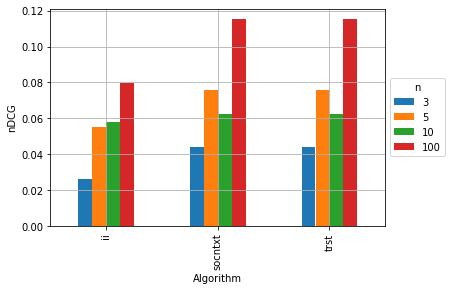

In [4]:
ndcg_df.pivot("Algorithm", "n", "ndcg").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('nDCG')
plt.show()

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


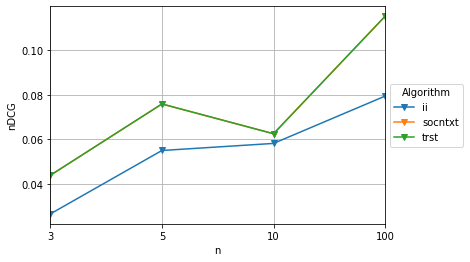

In [5]:
import numpy as np

ndcg_df_with_range = ndcg_df.replace({3:0, 5:1, 10:2, 100:3}) # In order to make the x axis equally spaced, we replace its values with their range: 0, 1, 2, 3
ndcg_df_with_range.pivot("n", "Algorithm", "ndcg").plot(marker="v")


ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Algorithm')
ax.grid(zorder=0)
ax.xaxis.set_ticks(np.arange(4)) # Because we have 4 n values 
ax.xaxis.set_ticklabels([3, 5, 10, 100]) # To make sure the actual n values are displayed on the x axis and not the range values (0, 1, 2, 3)
plt.ylabel('nDCG')
plt.show()

## Precision at n

In [6]:
df = pd.DataFrame({'Algorithm':precision100.index, 'precision':precision100.values, 'n':100})
precision_df = pd.concat([df, pd.DataFrame({'Algorithm':precision10.index, 'precision':precision10.values, 'n':10}), pd.DataFrame({'Algorithm':precision5.index, 'precision':precision5.values, 'n':5}), pd.DataFrame({'Algorithm':precision3.index, 'precision':precision3.values, 'n':3})], ignore_index=True)
print(precision_df.sort_values(by=['n', 'precision'], ascending=False))

Algorithm  precision    n
1    socntxt   0.003175  100
2       trst   0.003175  100
0         ii   0.002460  100
4    socntxt   0.009524   10
5       trst   0.009524   10
3         ii   0.008730   10
7    socntxt   0.019048    5
8       trst   0.019048    5
6         ii   0.014286    5
10   socntxt   0.018519    3
11      trst   0.018519    3
9         ii   0.010582    3


/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


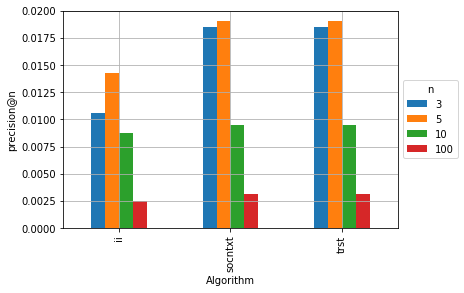

In [7]:
precision_df.pivot("Algorithm", "n", "precision").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('precision@n')
plt.show()

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


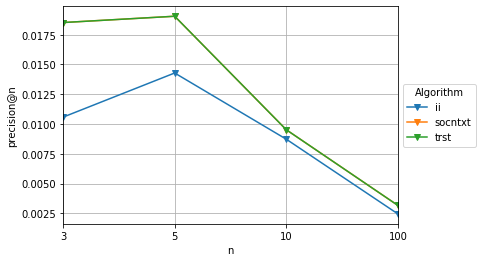

In [8]:
precision_df_with_range = precision_df.replace({3:0, 5:1, 10:2, 100:3}) # In order to make the x axis equally spaced, we replace its values with their range: 0, 1, 2, 3
precision_df_with_range.pivot("n", "Algorithm", "precision").plot(marker="v")


ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Algorithm')
ax.grid(zorder=0)
ax.xaxis.set_ticks(np.arange(4)) # Because we have 4 n values 
ax.xaxis.set_ticklabels([3, 5, 10, 100]) # To make sure the actual n values are displayed on the x axis and not the range values (0, 1, 2, 3)
plt.ylabel('precision@n')
plt.show()

## Recall at n

In [9]:
df = pd.DataFrame({'Algorithm':recall100.index, 'recall':recall100.values, 'n':100})
recall_df = pd.concat([df, pd.DataFrame({'Algorithm':recall10.index, 'recall':recall10.values, 'n':10}), pd.DataFrame({'Algorithm':recall5.index, 'recall':recall5.values, 'n':5}), pd.DataFrame({'Algorithm':recall3.index, 'recall':recall3.values, 'n':3})], ignore_index=True)
print(recall_df.sort_values(by=['n', 'recall'], ascending=False))

Algorithm    recall    n
1    socntxt  0.305556  100
2       trst  0.305556  100
0         ii  0.234127  100
4    socntxt  0.091270   10
5       trst  0.091270   10
3         ii  0.087302   10
7    socntxt  0.095238    5
8       trst  0.095238    5
6         ii  0.071429    5
10   socntxt  0.047619    3
11      trst  0.047619    3
9         ii  0.027778    3


/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


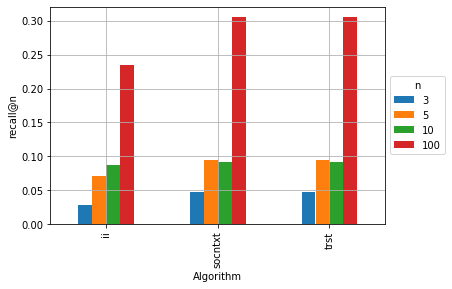

In [10]:
recall_df.pivot("Algorithm", "n", "recall").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('recall@n')
plt.show()

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


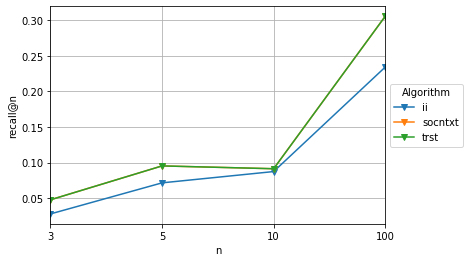

In [11]:
recall_df_with_range = recall_df.replace({3:0, 5:1, 10:2, 100:3}) # In order to make the x axis equally spaced, we replace its values with their range: 0, 1, 2, 3 
recall_df_with_range.pivot("n", "Algorithm", "recall").plot(marker="v")


ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Algorithm')
ax.grid(zorder=0)
ax.xaxis.set_ticks(np.arange(4)) # Because we have 4 n values 
ax.xaxis.set_ticklabels([3, 5, 10, 100]) # To make sure the actual n values are displayed on the x axis and not the range values (0, 1, 2, 3)
plt.ylabel('recall@n')
plt.show()

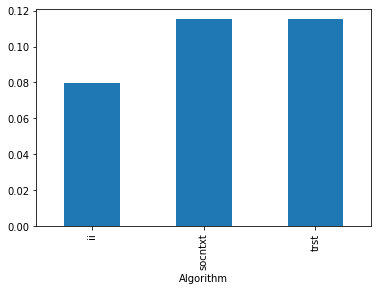

In [12]:
#set_matplotlib_formats('svg')
results100.groupby('Algorithm').ndcg.mean().plot.bar()

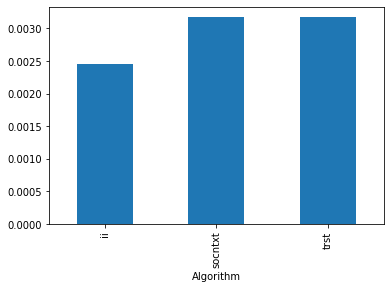

In [13]:
results100.groupby('Algorithm').precision.mean().plot.bar()

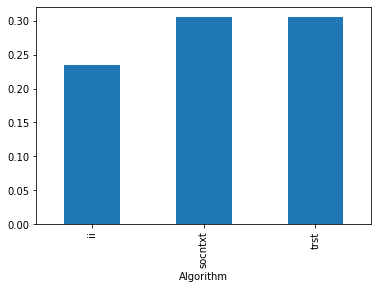

In [14]:
results100.groupby('Algorithm').recall.mean().plot.bar()

### 2. Prediction Metrics: RMSE

In [15]:
user_rmse = (preds100.groupby(['Algorithm', 'user']).apply(lambda df: rmse(df.prediction, df.rating))).dropna()
print(user_rmse.groupby('Algorithm').mean())

print(user_rmse['domex'])

plt.boxplot((user_rmse['ii'], user_rmse['trst'], user_rmse['socsim'], user_rmse['domex'], user_rmse['hierch'], user_rmse['socap'], user_rmse['soxsim'], user_rmse['symp'], user_rmse['rel']), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])
plt.show()


"""
print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))
print('Relationship: max rmse per user = ' + str(user_rmse_rel.max()) + ', min rmse per user = ' + str(user_rmse_rel.min()) + ', average rmse per user = ' + str(user_rmse_rel.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])

"""

Algorithm
ii         0.324450
socntxt    0.415507
trst       0.415507
dtype: float64


KeyError: 'domex'